In [82]:
import numpy as np
from twobessel import *
import matplotlib.pyplot as plt
import cambPK 

In [83]:
%run cambPK.py

In [84]:
cambPK.pk_out

array([[1.00000000e-04, 3.38379116e+02],
       [1.00052177e-04, 3.38549693e+02],
       [1.00104382e-04, 3.38720356e+02],
       ...,
       [2.49739317e-01, 1.61820544e+03],
       [2.49869625e-01, 1.61695156e+03],
       [2.50000000e-01, 1.61570077e+03]])

In [85]:
k, pk = np.loadtxt('Pk_test', usecols=(0,1), unpack=True)

len(k)

3000

In [86]:
x_vals = cambPK.pk_out[:,0]
y_vals = cambPK.pk_out[:,1]

len(x_vals)

15000

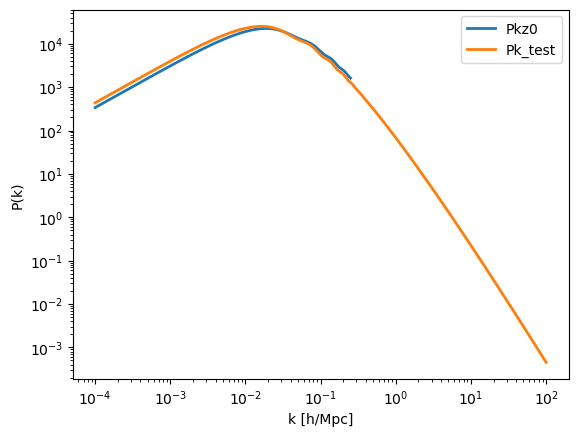

In [87]:

plt.plot(x_vals, y_vals, lw = 2.0, label = r'Pkz0')
plt.plot(k, pk, lw = 2.0, label = r'Pk_test')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'k [h/Mpc]');
plt.ylabel(r'P(k)')

plt.legend();

# Cosmic variance

In [132]:
k, pk = np.loadtxt('Pkz0.0.dat', usecols=(0, 1), unpack=True)

# Get the logk-spacing
dlnk = np.log(k[1]/k[0])

N = k.size
print('Number of data points: '+str(N))

ell1 = 0
ell2 = 0
nu = 1.01

# Define the input 'kernel'. It has to be a matri: transform the pk to a diagonal matrix
pk1k2 = np.diag(k**3 * pk**2 / dlnk)

Number of data points: 15000


In [133]:
# Define the class for spherical Bessel 

sph_bessel = two_sph_bessel(k, k, pk1k2, nu1=nu, nu2=nu,  N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=0)

r1, r2, Fr1Fr2 = sph_bessel.two_sph_bessel(ell1, ell2)

15000 15000
(15000, 15000)
15000 15000


In [134]:
# Drop results above 200 Mpc/h

criterion = r1 <= 200

d1 = r1[criterion]
d2 = r2[criterion]

var_00 = Fr1Fr2[:len(d1), :len(d2)]

In [135]:
d1

array([  4.        ,   4.0020871 ,   4.00417528, ..., 199.73935107,
       199.84356985, 199.94784302])

In [136]:
np.shape(var_00)

(7500, 7500)

In [137]:
np.shape(Fr1Fr2)

(15000, 15000)

In [138]:
from scipy.interpolate import RectBivariateSpline

# Create an interpolation function
f = RectBivariateSpline(d1, d2, var_00, kx=5, ky=5)

# Now you can call f with new r1 and r2 values to get an interpolated Fr1r2 value
r1_new = 20.  # replace with your desired r1 value
r2_new = 20.  # replace with your desired r2 value

Fr1r2_new = f(r1_new, r2_new)

In [139]:
Fr1r2_new

array([[55289.51871664]])

In [140]:
d1[325]

4.739002450962135

In [141]:
var_00[325, 325] / (2*np.pi**2)

34424.30611871764

In [142]:
d = np.arange(4, 175, 4)

d

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104,
       108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156,
       160, 164, 168, 172])

In [143]:
f(20, 20) / (2*np.pi**2), f(4,4)/ (2*np.pi**2)

(array([[2800.99973969]]), array([[46978.27244983]]))

In [144]:
var_00_172 = f(d, d)

In [145]:
np.shape(var_00_172)

(43, 43)

In [146]:
Omm=0.3111	 
Omb=0.0490	 
h=0.677	 
ns=0.9665	 
Acamb=2.105e-09

In [147]:
Omm*h**2, Omb*h**2

(0.1425861519, 0.022458121000000004)

In [148]:
np.diag(var_00_172)

array([9.27313929e+05, 2.71545152e+05, 1.36446106e+05, 8.19357926e+04,
       5.52895187e+04, 4.01819447e+04, 2.91753075e+04, 2.23753458e+04,
       1.80010053e+04, 1.44596767e+04, 1.18358675e+04, 9.59080545e+03,
       8.33972539e+03, 7.03723284e+03, 5.79610514e+03, 5.19217919e+03,
       4.32122594e+03, 3.96244541e+03, 3.27512435e+03, 3.04719962e+03,
       2.53309859e+03, 2.28118182e+03, 2.12691880e+03, 1.81080457e+03,
       1.67328006e+03, 1.56935637e+03, 1.39294185e+03, 1.31143063e+03,
       1.16791119e+03, 1.07656622e+03, 1.01490471e+03, 9.40731398e+02,
       8.72320397e+02, 8.01601467e+02, 7.35843780e+02, 6.88742870e+02,
       6.44440106e+02, 5.94876450e+02, 5.76144672e+02, 5.36367577e+02,
       5.19175879e+02, 4.80340240e+02, 4.49247761e+02])

In [149]:
varcosmic_mono_ = np.loadtxt('varcosmic_mono_bare.dat', skiprows=3)

In [150]:
varcosmic_mono_[1,1], var_00_172[0,0]/(2*np.pi**2)

(6679.41, 46978.27244983451)

In [151]:
varcosmic_mono_[0,:], varcosmic_mono_[:,0]

(array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]))

In [152]:
varcosmic_mono = varcosmic_mono_[1:,1:]

np.shape(varcosmic_mono)

(43, 43)

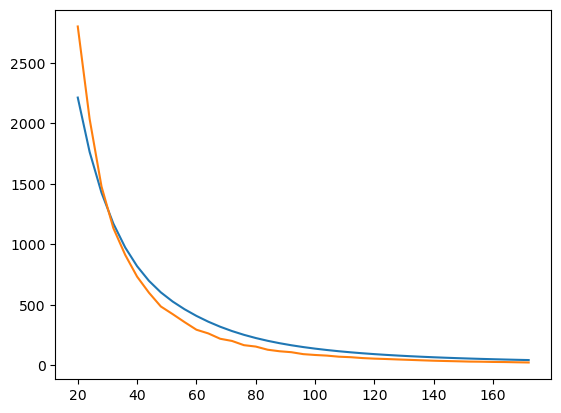

In [181]:
plt.plot(d[4:], np.diag(varcosmic_mono[4:, 4:]))
plt.plot(d[4:], np.diag(var_00_172[4:, 4:])/(2*np.pi**2))

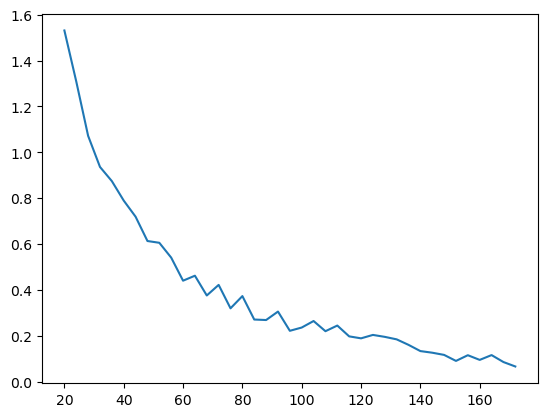

In [154]:
plt.plot(d[4:], np.abs((np.diag(var_00_172[4:, 4:])/(np.pi**2)-np.diag(varcosmic_mono[4:, 4:]))/np.diag(varcosmic_mono[4:, 4:])))

# Mixed terms

In [155]:
k, pk = np.loadtxt('Pkz0.0.dat', usecols=(0, 1), unpack=True)

# Get the logk-spacing
dlnk = np.log(k[1]/k[0])

N = k.size
print('Number of data points: '+str(N))

ell1 = 0
ell2 = 0
nu = 1.01

# Define the input 'kernel'. It has to be a matri: transform the pk to a diagonal matrix
pk1k2 = np.diag(k**3 * pk / dlnk)

Number of data points: 15000


In [156]:
# Define the class for spherical Bessel 

sph_bessel = two_sph_bessel(k, k, pk1k2, nu1=nu, nu2=nu,  N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=0)

r1, r2, Fr1Fr2 = sph_bessel.two_sph_bessel(ell1, ell2)

15000 15000
(15000, 15000)
15000 15000


In [157]:
# Drop results above 200 Mpc/h

criterion = r1 <= 200

d1 = r1[criterion]
d2 = r2[criterion]

mixvar_00 = Fr1Fr2[:len(d1), :len(d2)]

In [158]:
np.shape(mixvar_00)

(7500, 7500)

In [159]:
np.shape(Fr1Fr2)

(15000, 15000)

In [160]:
from scipy.interpolate import RectBivariateSpline

# Create an interpolation function
f = RectBivariateSpline(d1, d2, mixvar_00, kx=5, ky=5)

# Now you can call f with new r1 and r2 values to get an interpolated Fr1r2 value
r1_new = 20.  # replace with your desired r1 value
r2_new = 20.  # replace with your desired r2 value
Fr1r2_new = f(r1_new, r2_new)

In [161]:
Fr1r2_new

array([[4.28514504]])

In [162]:
d1[325]

4.739002450962135

In [175]:
mixvar_00[325, 325] / (2*np.pi**2)

3.1610834918042494

In [164]:
d = np.arange(4, 175, 4)

d

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104,
       108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156,
       160, 164, 168, 172])

In [176]:
f(20, 20) / (2*np.pi**2), f(4,4)/ (2*np.pi**2)

(array([[0.21708798]]), array([[4.19941217]]))

In [166]:
mixvar_00_172 = f(d, d)

In [167]:
np.shape(mixvar_00_172)

(43, 43)

In [168]:
np.diag(mixvar_00_172)

array([8.28930736e+01, 2.65216031e+01, 1.24582197e+01, 6.63435738e+00,
       4.28514504e+00, 3.00454758e+00, 2.05055979e+00, 1.54666121e+00,
       1.23145689e+00, 9.63148408e-01, 7.81609693e-01, 6.30949084e-01,
       5.42036096e-01, 4.57279971e-01, 3.80405103e-01, 3.37244688e-01,
       2.84120789e-01, 2.60757113e-01, 2.19344455e-01, 2.02492866e-01,
       1.74212805e-01, 1.57366297e-01, 1.45662112e-01, 1.28220395e-01,
       1.18380028e-01, 1.10210396e-01, 1.00037980e-01, 9.38690346e-02,
       8.47926567e-02, 7.89251270e-02, 7.43551575e-02, 6.90142972e-02,
       6.45628666e-02, 6.00905277e-02, 5.55698618e-02, 5.22968863e-02,
       4.93112417e-02, 4.58501876e-02, 4.40855244e-02, 4.15379943e-02,
       3.98450017e-02, 3.72568812e-02, 3.52306375e-02])

In [169]:
varmix_mono_ = np.loadtxt('varmix_mono_bare.dat', skiprows=3)

In [177]:
varmix_mono_[1,1], mixvar_00_172[0,0]/(2*np.pi**2)

(5.065468, 4.199412167083937)

In [171]:
varcosmic_mono_[0,:], varcosmic_mono_[:,0]

(array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]))

In [172]:
varmix_mono = varmix_mono_[1:,1:]

np.shape(varmix_mono)

(43, 43)

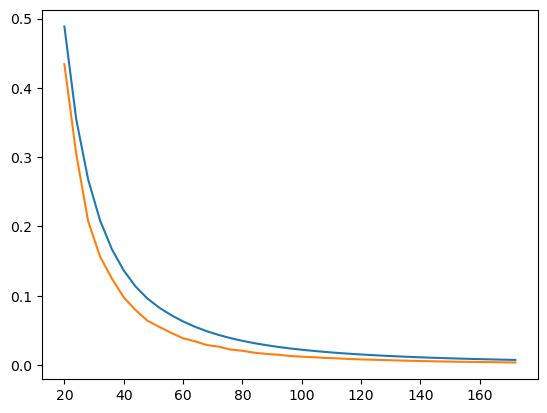

In [180]:
plt.plot(d[4:], np.diag(varmix_mono[4:, 4:]))
plt.plot(d[4:], np.diag(mixvar_00_172[4:, 4:])/(np.pi**2))

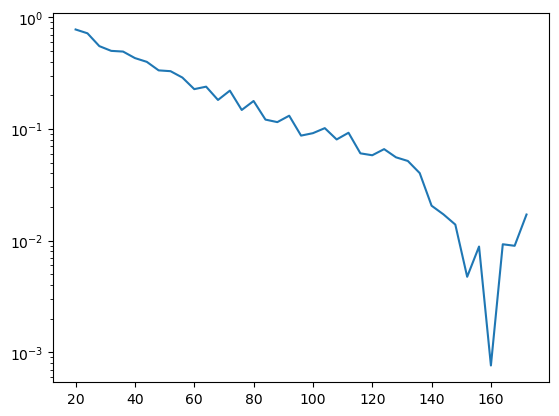

In [174]:
plt.plot(d[4:], np.abs((2*np.diag(mixvar_00_172[4:, 4:])/(np.pi**2)-np.diag(varmix_mono[4:, 4:]))/np.diag(varmix_mono[4:, 4:])))

plt.yscale('log')